<a href="https://colab.research.google.com/github/subhankar-nitt/Fraud-detection-demo/blob/CNN-Model/CNN%20Model/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import IPython
import keras
import tensorflow as tf

In [2]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/dataset/transactions.csv"
data = pd.read_csv(path)
data.shape

(13622, 13)

In [4]:
data.head()

,cc_num,first,last,trans_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
0,180094108369013,John,Holland,80f5177be11f0bcd768e06a0b1b294c8,2012-01-01T00:00:00.000+05:30,00:12:15,1325376735,personal_care,Hills-Boyer,64,39.011566,-119.937831,0
1,4368593032190508,Carla,Fleming,7933d389bf8ef8a11a8a301da6e6bc6c,2012-01-01T00:00:00.000+05:30,00:16:58,1325377018,gas_transport,Friesen-DAmore,133,40.149071,-75.589697,0
2,4361355512072,Matthew,Nelson,1467c318b5d73d22d6741f575db42f3f,2012-01-01T00:00:00.000+05:30,00:36:42,1325378202,entertainment,Larson-Moen,119,47.297797,-96.819362,0
3,4037295225657274,Antonio,Garcia,4a3848719d72daaa32c938ce43e0eb03,2012-01-01T00:00:00.000+05:30,00:37:59,1325378279,shopping_pos,Lynch Ltd,62,40.078781,-102.373954,0
4,4515092388857440,Timothy,Silva,02d27e94f279e1013a4c323eb8bb6811,2012-01-01T00:00:00.000+05:30,00:39:18,1325378358,shopping_pos,"Baumbach, Strosin and Nicolas",198,41.549359,-83.044403,0


In [5]:
data.is_fraud.nunique()

2

In [6]:
data.is_fraud.value_counts()

0    13108
1      514
Name: is_fraud, dtype: int64

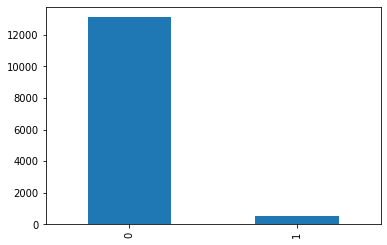

In [7]:
data.is_fraud.value_counts().plot.bar()

In [8]:
data.columns

Index(['cc_num', 'first', 'last', 'trans_num', 'trans_date', 'trans_time',
       'unix_time', 'category', 'merchant', 'amt', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')

In [9]:
data.dtypes

cc_num          int64
first          object
last           object
trans_num      object
trans_date     object
trans_time     object
unix_time       int64
category       object
merchant       object
amt             int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [10]:
data.isnull().sum()

cc_num        0
first         0
last          0
trans_num     0
trans_date    0
trans_time    0
unix_time     0
category      0
merchant      0
amt           0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

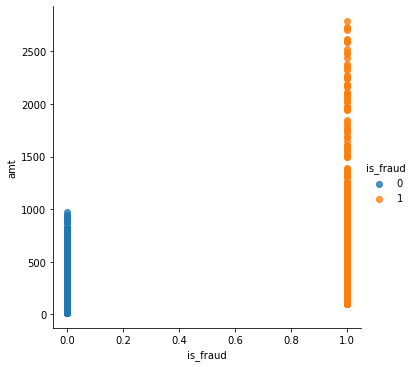

In [11]:
sns.lmplot(x='is_fraud', y='amt', data=data, fit_reg=False, hue='is_fraud')

In [12]:
data[data.amt>1000]

,cc_num,first,last,trans_num,trans_date,trans_time,unix_time,category,merchant,amt,merch_lat,merch_long,is_fraud
118,5157436163845247,Sara,Crawford,8e0299d3779108d4d28caa4381c8c26b,2012-01-02T00:00:00.000+05:30,01:23:34,1325467414,health_fitness,Dietrich-Fadel,1774,33.619662,-117.391852,1
120,5157436163845247,Sara,Crawford,2fe127c95a68344e6437cc88d35ab5e2,2012-01-02T00:00:00.000+05:30,01:52:06,1325469126,shopping_pos,Lynch Ltd,2013,34.570986,-118.711290,1
121,5157436163845247,Sara,Crawford,80d1082017324144866e8254de15b37d,2012-01-02T00:00:00.000+05:30,02:00:37,1325469637,shopping_pos,Hudson-Grady,1801,36.988153,-120.376765,1
166,5157436163845247,Sara,Crawford,c3d13d0ac25edc93448148f8ce51d375,2012-01-02T00:00:00.000+05:30,23:06:58,1325545618,kids_pets,"Yost, Schamberger and Windler",1978,34.865241,-117.415518,1
167,5157436163845247,Sara,Crawford,f7afbdef045b1316f7a5eb1d82ce8604,2012-01-02T00:00:00.000+05:30,23:14:41,1325546081,home,Collier LLC,1106,36.298320,-118.863027,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,38535403302699,William,Reed,d3b97c9785fdb203ebbc34e924661038,2012-01-23T00:00:00.000+05:30,22:21:01,1327357261,shopping_net,"Altenwerth, Cartwright and Koss",1190,38.371104,-84.733744,1
2149,38535403302699,William,Reed,a3936620043cf143ecc29598214f8279,2012-01-23T00:00:00.000+05:30,22:24:10,1327357450,grocery_pos,Pacocha-OReilly,1368,39.225709,-81.816459,1
2208,38535403302699,William,Reed,59d500376b6e4e65f72b874ebb681a23,2012-01-24T00:00:00.000+05:30,22:31:37,1327444297,grocery_pos,OKeefe-Hudson,1192,38.366534,-82.279188,1
2300,5417459284978545,Angel,Smith,e68c35829e8519a6bff4ed2740332b21,2012-01-25T00:00:00.000+05:30,22:31:23,1327530683,grocery_pos,Murray-Smitham,1057,43.003885,-76.795875,1


In [13]:
(data.is_fraud.value_counts())/(data.is_fraud.count())

0    0.962267
1    0.037733
Name: is_fraud, dtype: float64

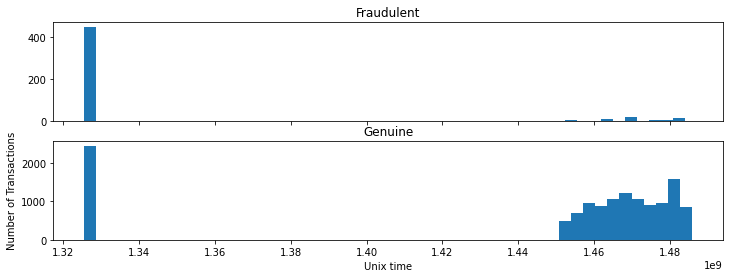

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["unix_time"][data["is_fraud"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(data["unix_time"][data["is_fraud"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Unix time')
plt.ylabel('Number of Transactions')
plt.show()

In [15]:
data= data.drop(["first", "last", "merchant", "trans_num"], axis=1)
data.head()

,cc_num,trans_date,trans_time,unix_time,category,amt,merch_lat,merch_long,is_fraud
0,180094108369013,2012-01-01T00:00:00.000+05:30,00:12:15,1325376735,personal_care,64,39.011566,-119.937831,0
1,4368593032190508,2012-01-01T00:00:00.000+05:30,00:16:58,1325377018,gas_transport,133,40.149071,-75.589697,0
2,4361355512072,2012-01-01T00:00:00.000+05:30,00:36:42,1325378202,entertainment,119,47.297797,-96.819362,0
3,4037295225657274,2012-01-01T00:00:00.000+05:30,00:37:59,1325378279,shopping_pos,62,40.078781,-102.373954,0
4,4515092388857440,2012-01-01T00:00:00.000+05:30,00:39:18,1325378358,shopping_pos,198,41.549359,-83.044403,0


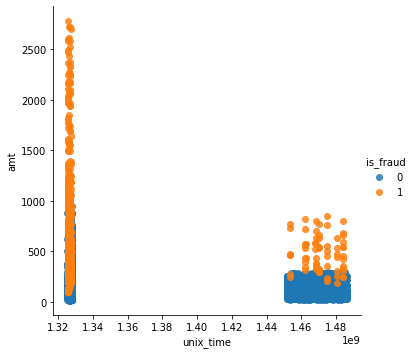

In [16]:
sns.lmplot(x='unix_time', y='amt', data=data, fit_reg=False, hue='is_fraud')

In [17]:
data.category = pd.Categorical(pd.factorize(data.category)[0] + 1)
data.head()

,cc_num,trans_date,trans_time,unix_time,category,amt,merch_lat,merch_long,is_fraud
0,180094108369013,2012-01-01T00:00:00.000+05:30,00:12:15,1325376735,1,64,39.011566,-119.937831,0
1,4368593032190508,2012-01-01T00:00:00.000+05:30,00:16:58,1325377018,2,133,40.149071,-75.589697,0
2,4361355512072,2012-01-01T00:00:00.000+05:30,00:36:42,1325378202,3,119,47.297797,-96.819362,0
3,4037295225657274,2012-01-01T00:00:00.000+05:30,00:37:59,1325378279,4,62,40.078781,-102.373954,0
4,4515092388857440,2012-01-01T00:00:00.000+05:30,00:39:18,1325378358,4,198,41.549359,-83.044403,0


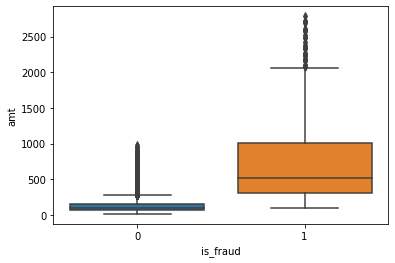

In [18]:
sns.boxplot(x=data.is_fraud, y=data.amt)

In [19]:
data["trans_date"] = pd.to_datetime(data["trans_date"]).dt.strftime("%Y%m%d")
data.head()

,cc_num,trans_date,trans_time,unix_time,category,amt,merch_lat,merch_long,is_fraud
0,180094108369013,20120101,00:12:15,1325376735,1,64,39.011566,-119.937831,0
1,4368593032190508,20120101,00:16:58,1325377018,2,133,40.149071,-75.589697,0
2,4361355512072,20120101,00:36:42,1325378202,3,119,47.297797,-96.819362,0
3,4037295225657274,20120101,00:37:59,1325378279,4,62,40.078781,-102.373954,0
4,4515092388857440,20120101,00:39:18,1325378358,4,198,41.549359,-83.044403,0


In [20]:
import time, datetime
def convertTime(t):
    x = time.strptime(t,'%H:%M:%S')
    return str(int(datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()))

In [21]:
data.trans_time=data.trans_time.apply(convertTime)
data.head()

,cc_num,trans_date,trans_time,unix_time,category,amt,merch_lat,merch_long,is_fraud
0,180094108369013,20120101,735,1325376735,1,64,39.011566,-119.937831,0
1,4368593032190508,20120101,1018,1325377018,2,133,40.149071,-75.589697,0
2,4361355512072,20120101,2202,1325378202,3,119,47.297797,-96.819362,0
3,4037295225657274,20120101,2279,1325378279,4,62,40.078781,-102.373954,0
4,4515092388857440,20120101,2358,1325378358,4,198,41.549359,-83.044403,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13622 entries, 0 to 13621
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cc_num      13622 non-null  int64   
 1   trans_date  13622 non-null  object  
 2   trans_time  13622 non-null  object  
 3   unix_time   13622 non-null  int64   
 4   category    13622 non-null  category
 5   amt         13622 non-null  int64   
 6   merch_lat   13622 non-null  float64 
 7   merch_long  13622 non-null  float64 
 8   is_fraud    13622 non-null  int64   
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 865.5+ KB


In [23]:
data['cc_num'] = np.asarray(data['cc_num']).astype(np.float32)
data['trans_date'] = np.asarray(data['trans_date']).astype(np.float32)
data['trans_time'] = np.asarray(data['trans_time']).astype(np.float32)
data['unix_time'] = np.asarray(data['unix_time']).astype(np.float32)
data['category'] = np.asarray(data['category']).astype(np.float32)
data['amt'] = np.asarray(data['amt']).astype(np.float32)
data['merch_lat'] = np.asarray(data['merch_lat']).astype(np.float32)
data['merch_long'] = np.asarray(data['merch_long']).astype(np.float32)

In [24]:
data.dtypes

cc_num        float32
trans_date    float32
trans_time    float32
unix_time     float32
category      float32
amt           float32
merch_lat     float32
merch_long    float32
is_fraud        int64
dtype: object

In [25]:
data.var()

cc_num        5.574645e+30
trans_date    2.983649e+08
trans_time    5.802106e+08
unix_time     3.500578e+15
category      1.922959e+01
amt           3.409054e+04
merch_lat     3.201748e+01
merch_long    1.590047e+02
is_fraud      3.631196e-02
dtype: float64